QUESTION 1. DATA PREPROCESSING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer

# Loading the data set
MalePlayers = pd.read_csv("/content/drive/MyDrive/AI/male_players (legacy).csv")
Players22 =  pd.read_csv("/content/drive/MyDrive/AI/players_22.csv")

# Droping all columns with nan values of 30%
Less_nan = []
more_nan = []
for i in MalePlayers.columns:
    if((MalePlayers[i].isnull().sum()) < (0.3 * (MalePlayers.shape[0]))):
        Less_nan.append(i)

    else:
        more_nan.append(i)



MalePlayers = MalePlayers[Less_nan]

columns_to_drop = [
    "ls", "st", "rs", "lw", "lf", "cf", "rf", "rw",
    "lam", "cam", "ram", "lm", "lcm", "cm", "rcm", "rm",
    "lwb", "ldm", "cdm", "rdm", "rwb", "lb", "lcb", "cb",
    "rcb", "rb", "gk"
]

MalePlayers = MalePlayers.drop(columns=columns_to_drop)

# Separating the data set into numeric and categorical
numeric_data = MalePlayers.select_dtypes(include = np.number)
categorical_data = MalePlayers.select_dtypes(include = ['object'])


#Simple imputing the numeric data set and encoding the categorical dataset
#Numeric
imp = IterativeImputer(max_iter=10, random_state=0)
numeric_data = pd.DataFrame(np.round(imp.fit_transform(numeric_data)), columns=numeric_data.copy().columns)


#Categorical
values = np.array(categorical_data)
label_encoder = LabelEncoder()
label_encoder

for column in categorical_data.columns:
    if categorical_data[column].dtype == 'object':

        categorical_data[column] = categorical_data[column].astype(str)

        categorical_data[column] = label_encoder.fit_transform(categorical_data[column])



# Joining the numeric and the categorical
New_male_players= pd.concat([numeric_data,categorical_data],axis=1)


# Simple inputing the data set
simple_imput = SimpleImputer()
replace_data = simple_imput.fit_transform(New_male_players)
replace_data

New_male_players = pd.DataFrame(replace_data, columns = New_male_players.columns)
New_male_players


# Displaying 50 rows of the data
New_male_players.head(50)

<ipython-input-24-b449b7e1b5bf>:9: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  MalePlayers = pd.read_csv("/content/drive/MyDrive/AI/male_players (legacy).csv")
<ipython-input-24-b449b7e1b5bf>:10: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  Players22 =  pd.read_csv("/content/drive/MyDrive/AI/players_22.csv")


,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,league_name,club_name,club_position,club_joined_date,nationality_name,preferred_foot,work_rate,body_type,real_face,player_face_url
0,158023.0,15.0,2.0,93.0,95.0,100500000.0,550000.0,27.0,169.0,67.0,...,15.0,478.0,3.0,48.0,6.0,0.0,7.0,3.0,1.0,8069.0
1,20801.0,15.0,2.0,92.0,92.0,79000000.0,375000.0,29.0,185.0,80.0,...,15.0,1013.0,14.0,249.0,134.0,1.0,1.0,5.0,1.0,697.0
2,9014.0,15.0,2.0,90.0,90.0,54500000.0,275000.0,30.0,180.0,80.0,...,6.0,481.0,28.0,268.0,117.0,0.0,1.0,4.0,1.0,313.0
3,41236.0,15.0,2.0,90.0,90.0,52500000.0,275000.0,32.0,195.0,95.0,...,26.0,947.0,27.0,659.0,161.0,1.0,7.0,5.0,1.0,878.0
4,167495.0,15.0,2.0,90.0,90.0,63500000.0,300000.0,28.0,193.0,92.0,...,6.0,481.0,5.0,481.0,64.0,1.0,8.0,5.0,1.0,11661.0
5,41.0,15.0,2.0,89.0,89.0,36000000.0,250000.0,30.0,170.0,65.0,...,15.0,478.0,9.0,29.0,156.0,1.0,2.0,3.0,1.0,12.0
6,176580.0,15.0,2.0,89.0,91.0,49500000.0,300000.0,27.0,181.0,81.0,...,15.0,478.0,21.0,1269.0,178.0,1.0,2.0,4.0,1.0,16242.0
7,7826.0,15.0,2.0,88.0,88.0,40500000.0,230000.0,30.0,187.0,71.0,...,32.0,822.0,24.0,706.0,117.0,0.0,7.0,5.0,1.0,281.0
8,121944.0,15.0,2.0,88.0,88.0,39000000.0,200000.0,29.0,183.0,79.0,...,6.0,481.0,28.0,29.0,64.0,1.0,0.0,4.0,1.0,2734.0
9,156616.0,15.0,2.0,88.0,88.0,33000000.0,200000.0,31.0,170.0,72.0,...,6.0,481.0,28.0,121.0,60.0,1.0,2.0,3.0,1.0,7610.0


QUESTION 2.        FEATURE ENGINEERING

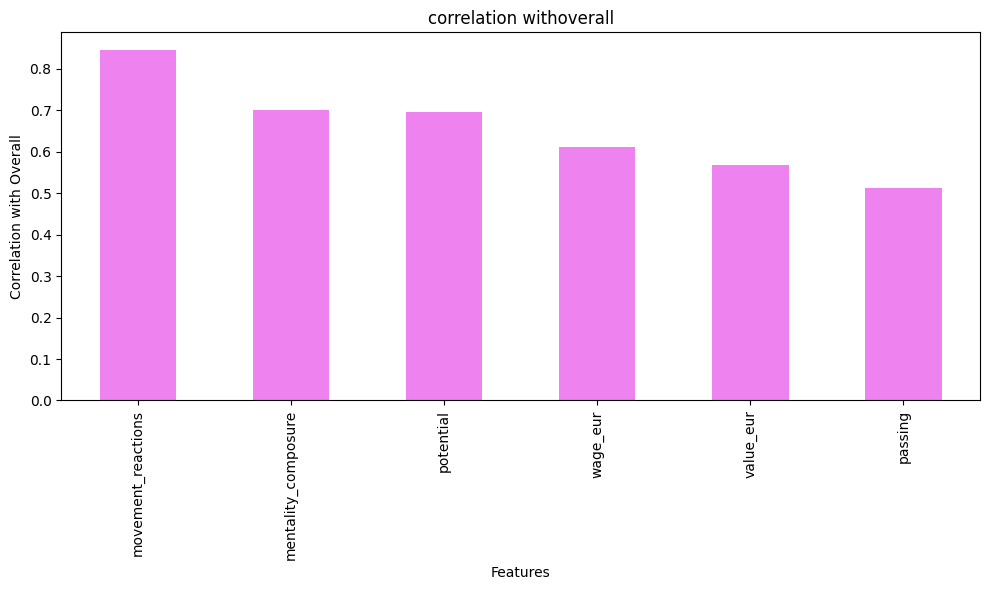

In [25]:
#Visualizing the data to see the relation among the dataset
import matplotlib.pyplot as plt
def plot_correlation(df, target_column, columns_to_plot):
    correlation_columns = df[columns_to_plot].corrwith(df[target_column])

    correlation_columns = correlation_columns.sort_values(ascending = False)

    plt.figure(figsize = (10,6))
    correlation_columns.plot(kind = 'bar', color = 'violet')
    plt.title(f'correlation with{target_column}')
    plt.xlabel('Features')
    plt.ylabel('Correlation with Overall')
    plt.xticks(rotation = 90)
    plt.tight_layout()
    plt.show()

# Correlating the data set, to get the 10 most important features
correlated_data = New_male_players.corr()

predictive_variable = correlated_data['overall']

filtered_columns = predictive_variable[predictive_variable.abs() > 0.5].nlargest(10).index.tolist()

New_male_players = New_male_players[filtered_columns]

plot_correlation(New_male_players, 'overall', New_male_players.drop('overall', axis = 1).columns.tolist())


# Separating the data to y(predictive)  and X(other than the response)
y = New_male_players['overall']
X = New_male_players.drop('overall', axis = 1)

# Sclaing the independent data set
scaler=StandardScaler()
X=scaler.fit_transform(X)

QUESTION3.  TRAINING MODELS

In [26]:
from sklearn.model_selection import cross_val_score,  train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, KFold
import xgboost as xgb


Xtrain,Xtest,Ytrain,Ytest=train_test_split(X, y, test_size=0.2,random_state=42)

# Declaring the numder of fold
n_fold = 10
kfold = KFold(n_splits=n_fold, shuffle=True, random_state=42)

# Training with the Random Forest Model
randomForest = RandomForestRegressor(n_estimators=10, random_state=42)
randomForest.fit(Xtrain, Ytrain)

# Making predictions on the test set
predictions = randomForest.predict(Xtest)

# Calculating mean squared error on test set
mse = mean_squared_error(Ytest, predictions)
print("Mean Squared Error on Test Set:", mse)

# Performing cross validation
rforest_scores = cross_val_score(randomForest, Xtrain, Ytrain, cv=kfold, scoring='neg_mean_squared_error')
print("Cross-validated Mean Squared Error:", np.sqrt(np.mean(-rforest_scores)))


print(f"Prediction with RandomForest:  {predictions}")


Mean Squared Error on Test Set: 2.5150775850687457
Cross-validated Mean Squared Error: 1.5979875061071873
Prediction with RandomForest:  [68.7 65.4 70.2 ... 56.  65.  55.4]


In [27]:
# Training with the Gradient Boosting

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

gradientBoosting = GradientBoostingRegressor(n_estimators=150, random_state=42)

gradientBoosting.fit(Xtrain, Ytrain)

predictions = gradientBoosting.predict(Xtest)

print("Size of prediction: ", len(predictions))
print("Prediction with Gradient Boosting: \n", predictions)

# Calculate mean squared error on test set
mse = mean_squared_error(Ytest, predictions)
print("Mean Squared Error on Test Set:", mse)

# Perform cross-validation if needed
gb_scores = cross_val_score(gradientBoosting, Xtrain, Ytrain, cv=kfold, scoring='neg_mean_squared_error')
print("Cross-validated Root Mean Squared Error:", np.sqrt(np.mean(-gb_scores)))

Size of prediction:  32317
Prediction with Gradient Boosting: 
 [63.52096597 63.65196529 68.82532332 ... 57.52835054 65.06706033
 53.55357931]
Mean Squared Error on Test Set: 3.144702537456466
Cross-validated Root Mean Squared Error: 1.7787381632983288


In [ ]:
!pip install xgboost

In [28]:
# Training with the Xgboosting
import xgboost as xgb

xgBoost = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=150, random_state=42)

xgBoost.fit(Xtrain, Ytrain)

predictions = xgBoost.predict(Xtest)

print("Size of prediction: ", len(predictions))



mse = mean_squared_error(Ytest, predictions)
print("Mean Squared Error on Test Set:", mse)


xgb_scores = cross_val_score(xgBoost, Xtrain, Ytrain, cv=kfold, scoring='neg_mean_squared_error')
print("Cross-validated Root Mean Squared Error:", np.sqrt(np.mean(-xgb_scores)))

print("Prediction with XGBoost: \n", predictions)

Size of prediction:  32317
Mean Squared Error on Test Set: 2.438551362136479
Cross-validated Root Mean Squared Error: 1.5690622141705326
Prediction with XGBoost: 
 [67.31049  64.10582  69.44073  ... 56.69979  64.2654   54.035698]


QUESTION4. EVALUATION

In [34]:
#  Hyperparameter Tuning for xgboosting:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search_xgboost = GridSearchCV(xgBoost, param_grid_xgb, cv=kfold, scoring='neg_mean_absolute_error')
grid_search_xgboost.fit(X, y)

predictions = grid_search_xgboost.predict(Xtest)

mserror = mean_squared_error(Ytest, predictions)
print("Mean Squared Error on Test Set:", mserror)


best_xgb_model = grid_search_xgboost.best_estimator_
print("Best XGBoost Parameters: {grid_search_xgboost.best_params_}")

print(f"The prediction after tunning for xgboost:  {predictions}")


Best XGBoost Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
The prediction after tunning for xgboost:  [65.03307  64.227905 69.57116  ... 56.999947 64.96428  54.675694]


In [38]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import numpy as np



# Split data into training and test sets
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Declaring the number of folds for cross-validation
n_fold = 10
kfold = KFold(n_splits=n_fold, shuffle=True, random_state=42)

# Define individual models
randomForest = RandomForestRegressor(n_estimators=10, random_state=42)
gradientBoosting = GradientBoostingRegressor(n_estimators=150, random_state=42)
xgBoost = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=150, random_state=42)

# Create a VotingRegressor with the three base models
ensemble_model = VotingRegressor([
    ('Random Forest', randomForest),
    ('Gradient Boosting', gradientBoosting),
    ('XGBoost', xgBoost)
])

# Training the ensemble model
ensemble_model.fit(Xtrain, Ytrain)

# Making predictions and evaluating the ensemble model
predictions = ensemble_model.predict(Xtest)
mse = mean_squared_error(Ytest, predictions)
print("Ensemble Model Mean Squared Error on Test Set:", mse)

# Perform cross-validation if needed
ensemble_scores = cross_val_score(ensemble_model, Xtrain, Ytrain, cv=kfold, scoring='neg_mean_squared_error')
print("Ensemble Model Cross-validated Root Mean Squared Error:", np.sqrt(np.mean(-ensemble_scores)))


Ensemble Model Mean Squared Error on Test Set: 2.3771936486612453
Ensemble Model Cross-validated Root Mean Squared Error: 1.5529134966200053


In [ ]:
#  Hyperparameter Tuning for Gradient boosting:
import joblib
from sklearn.model_selection import RandomizedSearchCV
param_ensemble= {
    'Random Forest__n_estimators': [50, 100, 200],
    'Random Forest__max_depth': [None, 10, 20],
    'Random Forest__min_samples_split': [2, 5, 10],
    'Random Forest__min_samples_leaf': [1, 2, 4],
    'XGBoost__n_estimators': [50, 100, 200],
    'XGBoost__max_depth': [3, 6, 9],
    'XGBoost__learning_rate': [0.01, 0.1, 0.2],
    'Gradient Boosting__n_estimators': [50, 100, 200],
    'Gradient Boosting__max_depth': [3, 6, 9],
    'Gradient Boosting__learning_rate': [0.01, 0.1, 0.2]
}


joblib_parallel_backend = joblib.parallel_backend('loky', n_jobs=-1)

with joblib_parallel_backend:
    # Performing RandomizedSearchCV for the ensemble model
    grid_search = RandomizedSearchCV(ensemble_model, param_ensemble, cv=5, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)
    grid_search.fit(Xtrain, Ytrain)
predicted = grid_search.predict(Xtest)

mserror = mean_squared_error(Ytest, predicted)
print("Mean Squared Error on Test Set:", mserror)

best_gb_model = grid_search.best_estimator_
print(f"Best Gradient Boosting Parameters: {grid_search.best_params_}")

print(f"The prediction after tuning for gradient boosting is : {predicted}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


QUESTION 5.  TESTING WITH THE PLAYER22 DATA SET

In [20]:
def preprocess_data(df, columns_of_interest):
    # Select columns of interest
    df = df[columns_of_interest]

    # Separating the data into numeric and categorical
    numeric_data = df.select_dtypes(include=np.number)
    categorical_data = df.select_dtypes(include=['object'])

    # Imputing the numeric data
    imp = IterativeImputer(max_iter=10, random_state=0)
    numeric_data = pd.DataFrame(np.round(imp.fit_transform(numeric_data)), columns=numeric_data.columns)

    # Encode the categorical data
    label_encoder = LabelEncoder()
    for column in categorical_data.columns:
        if categorical_data[column].dtype == 'object':
            categorical_data[column] = categorical_data[column].astype(str)
            categorical_data[column] = label_encoder.fit_transform(categorical_data[column])

    # Join the numeric and categorical data
    df = pd.concat([numeric_data, categorical_data], axis=1)

    # Simple impute the entire data set
    simple_imput = SimpleImputer()
    replace_data = simple_imput.fit_transform(df)
    df = pd.DataFrame(replace_data, columns=df.columns)

    return df





In [23]:
# Example usage
columns_of_interest = ['overall', 'movement_reactions', 'mentality_composure', 'potential',
                       'wage_eur', 'value_eur', 'passing']

# Assume player22 is your DataFrame
Player22 = preprocess_data(Players22, columns_of_interest)


Player22.head()




,overall,movement_reactions,mentality_composure,potential,wage_eur,value_eur,passing
0,93.0,94.0,96.0,93.0,320000.0,78000000.0,91.0
1,92.0,93.0,88.0,92.0,270000.0,119500000.0,79.0
2,91.0,94.0,95.0,91.0,270000.0,45000000.0,80.0
3,91.0,89.0,93.0,91.0,270000.0,129000000.0,86.0
4,91.0,91.0,89.0,91.0,350000.0,125500000.0,93.0


In [ ]:
# Separating into test
y_test = Player22['overall']
X_test = Player22.drop('overall', axis = 1)



# Evaluating the best model
from sklearn.metrics import mean_absolute_error, root_mean_s

# Evaluate  emblemed Model
rf_pred = grid_search.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
print(f"Random Forest Test MAE: {rf_mae}")
print(f"Random Forest Test RMSE: {np.sqrt(rf_mae)}")



In [ ]:
import joblib

joblib.dump(xgBoost, "model.pkl")


In [ ]:
import joblib

loaded_model = joblib.load("model.pkl")
loaded_scaler = joblib.load("scaler.pkl")